In [1]:
from calc_trust import *
from generate_attestations import *

num_wallets = 10
wallet_addresses = generate_wallet_addresses(num_wallets)
attestations = []
attestations = generate_attestations(100,wallet_addresses=wallet_addresses, attestations=attestations)
updated_attestations, wallet_addresses = calculate_trust(attestations,wallet_addresses)
# for attestation in updated_attestations:   
#     print(attestation.Tc)

Trusted attester: address5
Trusted attester: address4
Trusted attester: address4
Trusted attester: address3
Trusted attester: address6
Trusted attester: address9
Trusted attester: address9
Trusted attester: address6


In [6]:
wallet_addresses['address1']

{'role': 'dishonest',
 'is_human': True,
 'is_bot': False,
 'creditworthiness': 0.03326744120050018,
 'calculated_trust': {'is_human': 0.38,
  'is_bot': 0.38,
  'creditworthiness': 0.38}}

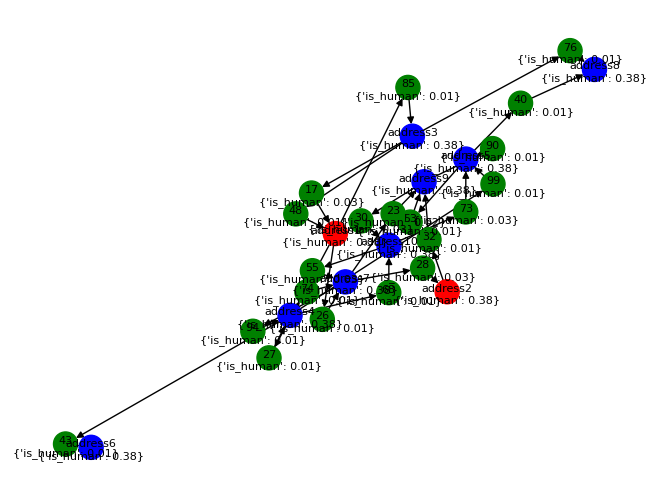

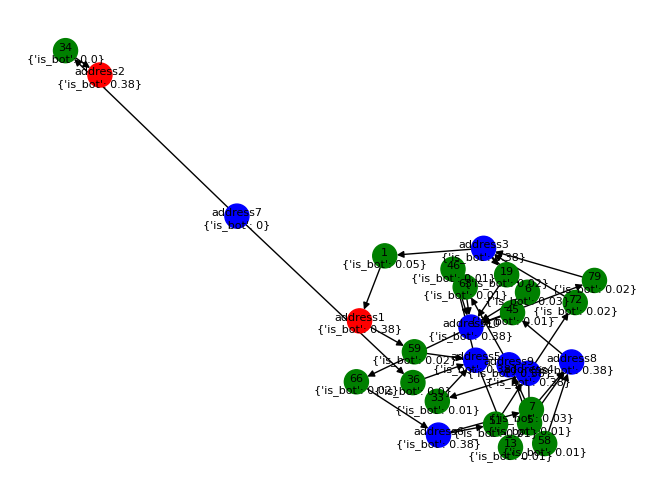

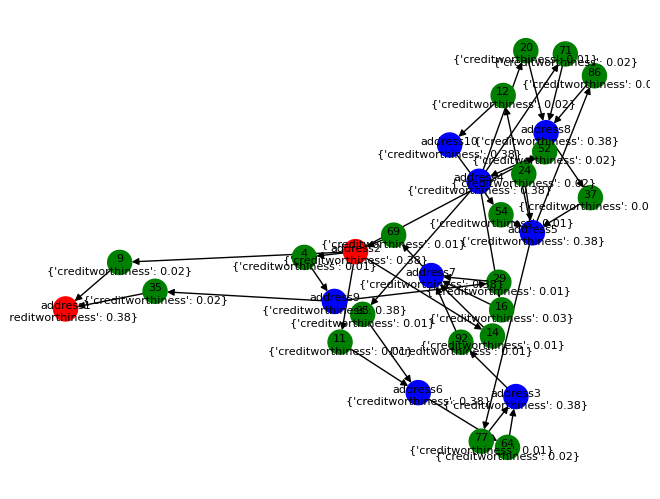

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def create_network_graph(wallet_addresses, attestations, selected_claim):
    G = nx.DiGraph()  # Directed graph, as attestations are directed from attester to recipient
    
    # Filter attestations based on the selected claim
    filtered_attestations = [attestation for attestation in attestations if selected_claim in attestation.data.keys()]
    
    # Add nodes for wallet addresses
    for address, properties in wallet_addresses.items():
        color = 'blue' if properties['role'] == 'honest' else 'red'
        
        # Find associated attestations for this address and selected claim
        associated_attestations = [attestation for attestation in filtered_attestations if attestation.attester == address or attestation.recipient == address]
        
        if not associated_attestations:  # Skip if no associated attestations for this address and claim
            continue
        
        # Assuming each address has at least one associated attestation
        associated_attestation = associated_attestations[0]
        G.add_node(address, color=color, role=properties['role'], label=f"{address}\n{associated_attestation.Ti_attester if associated_attestation.attester == address else associated_attestation.Ti_recipient}")
        
    # Add nodes for attestations and edges from attester to attestation and from attestation to recipient
    for attestation in filtered_attestations:
        G.add_node(attestation.uid, color='green', role='attestation', label=f"{attestation.uid}\n{attestation.Tc}")
        G.add_edge(attestation.attester, attestation.uid, role='attester_to_attestation')
        if attestation.recipient:  # If there is a recipient, add edge from attestation to recipient
            G.add_edge(attestation.uid, attestation.recipient, role='attestation_to_recipient')
    
    return G



def draw_network_graph(G):
    pos = nx.spring_layout(G)
    colors = [node[1]['color'] for node in G.nodes(data=True)]
    labels = {node: data['label'] for node, data in G.nodes(data=True)}
    
    nx.draw(G, pos, node_color=colors, with_labels=False)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, verticalalignment='center_baseline')
    plt.show()

# Assuming wallet_addresses and attestations are already defined
selected_claim = "is_human"  # Or any other claim you want to visualize
G = create_network_graph(wallet_addresses, attestations, selected_claim)
draw_network_graph(G)

selected_claim = "is_bot"  # Or any other claim you want to visualize
G = create_network_graph(wallet_addresses, attestations, selected_claim)
draw_network_graph(G)

selected_claim = "creditworthiness"  # Or any other claim you want to visualize
G = create_network_graph(wallet_addresses, attestations, selected_claim)
draw_network_graph(G)

In [4]:
from pyvis.network import Network

def draw_network_graph(G):
    nt = Network(notebook=True)
    
    # Add nodes and edges to the pyvis network
    for node, data in G.nodes(data=True):
        nt.add_node(node, title=data['label'], color=data['color'])
    
    for source, target, data in G.edges(data=True):
        nt.add_edge(source, target)
    
    # Display the interactive graph
    nt.show("temp.html")
